# Read the data from Data_Preprocessing

In [5]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = pd.read_csv('Data/X.csv')
y = pd.read_csv('Data/y.csv')

X_decoded = pd.read_csv('Data/X_decoded.csv')
y_decoded = pd.read_csv('Data/y_decoded.csv')

df_decoded = pd.read_csv('Data/df_decoded.csv')

# Look at the Ys (drugs)

In [3]:
# Let's see what are the most frequently used drugs. 0 - never used and 6 - last day. So we can sum up the numbers per each column to get this insgiht
# For some drugs we might have vast majority of people who never took it, but a small amount of people that absorb it on a daily basis (addicted individuals). That's why diving the sums per
# number of people would be a good idea
values = []
for col in y_decoded.columns:
    total_use = sum(y_decoded[col]) / len(y_decoded)
    values.append(total_use)
values

sums = pd.Series(values,index=y_decoded.columns)
sums.sort_values(ascending=False)


caff         5.483820
choc         5.106631
alcohol      4.635013
nicotine     3.200531
cannabis     2.989390
benzos       1.465252
legalh       1.355968
amphet       1.340584
ecstasy      1.314058
mushrooms    1.187268
coke         1.161273
lsd          1.061538
meth         0.826525
amyl         0.606897
ketamine     0.569231
vsa          0.433422
heroin       0.374005
crack        0.297613
semer        0.009549
dtype: float64

In [4]:
# We can see that the legal substances - coffee, chocolate, alcohol and nicotine - are the most frequently used ones. 
# The most frequently used illegal drug is cannabis - but attention - in some countries it may be legal.
# Drug semer is actually an artificial drug made up by the study author to detect the over-claiming study participants

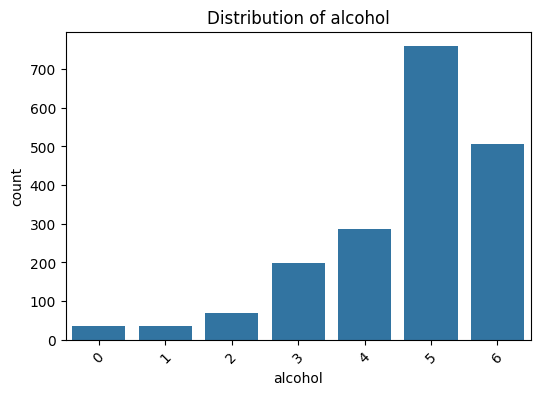

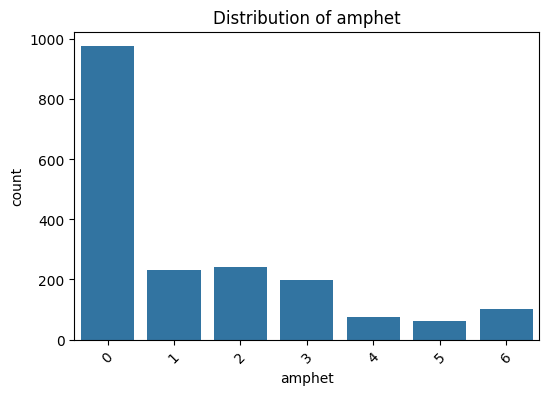

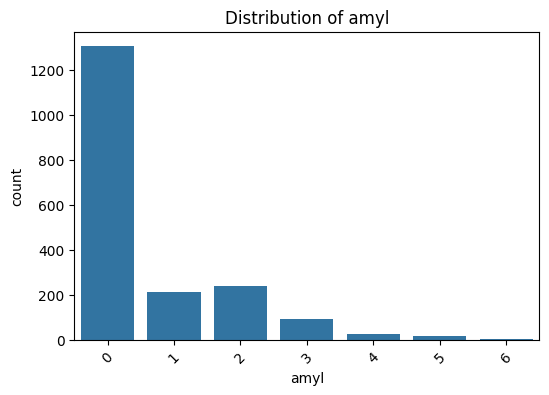

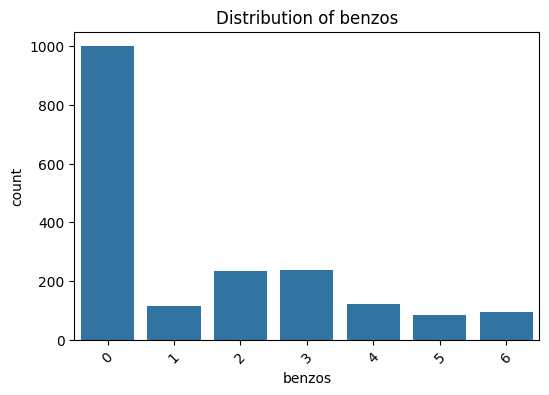

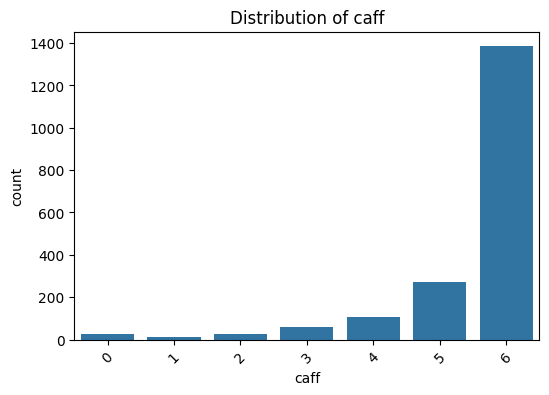

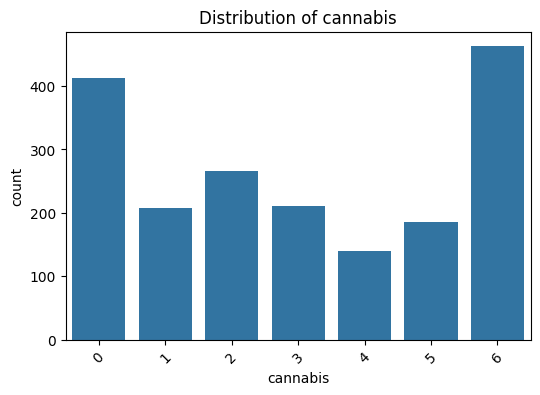

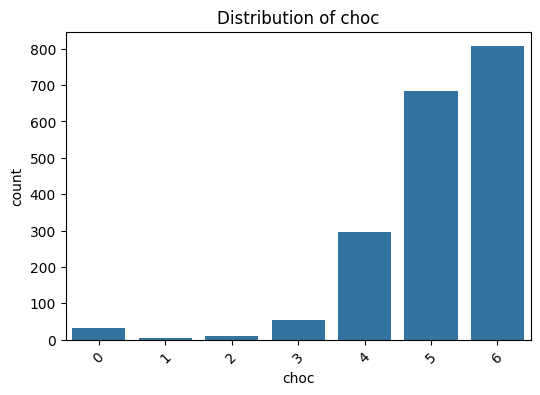

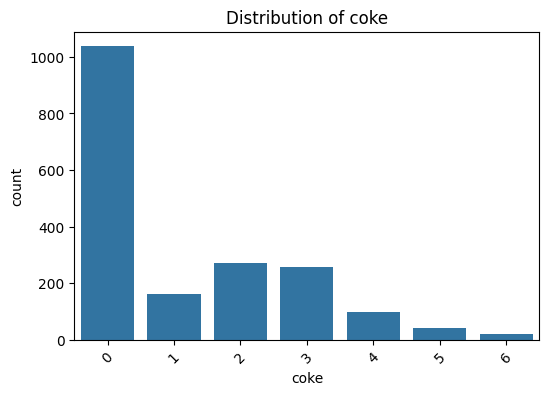

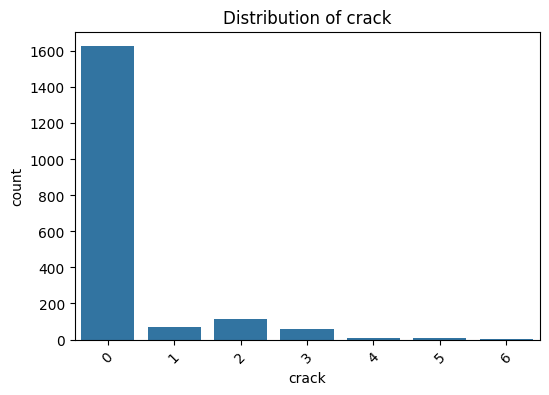

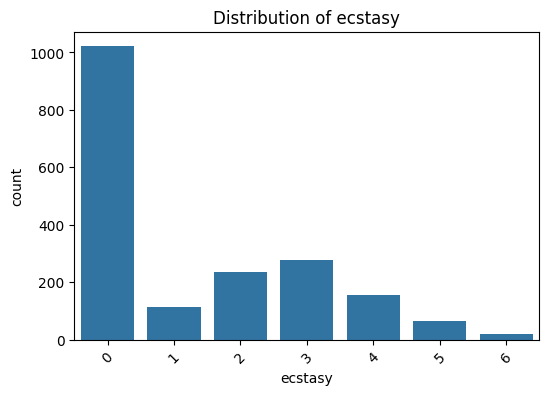

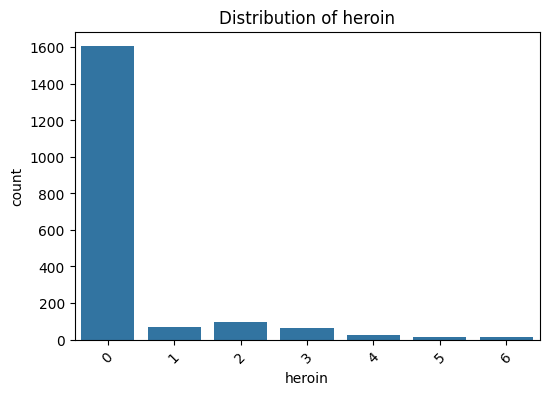

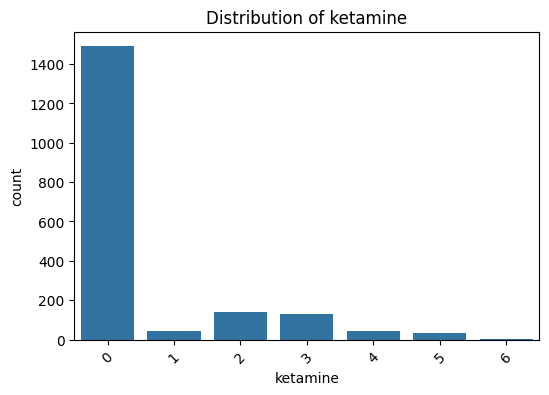

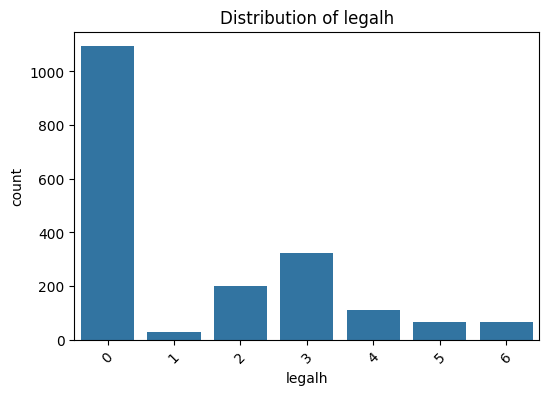

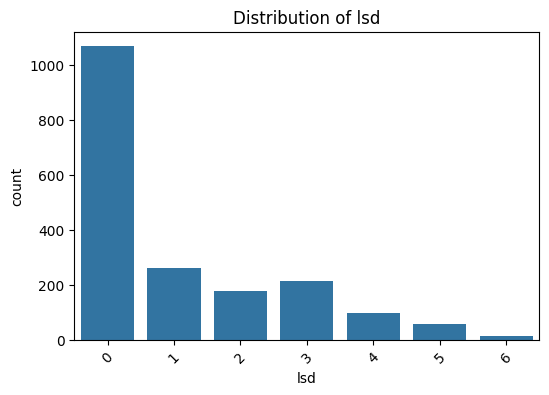

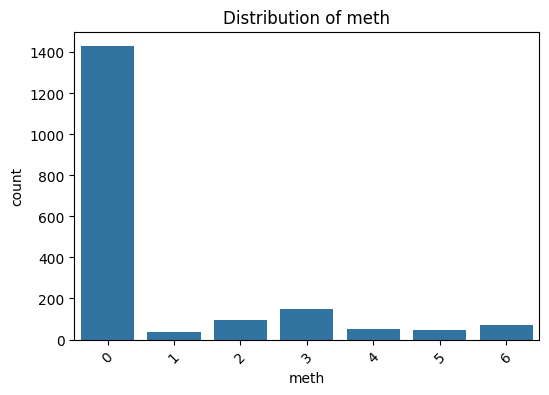

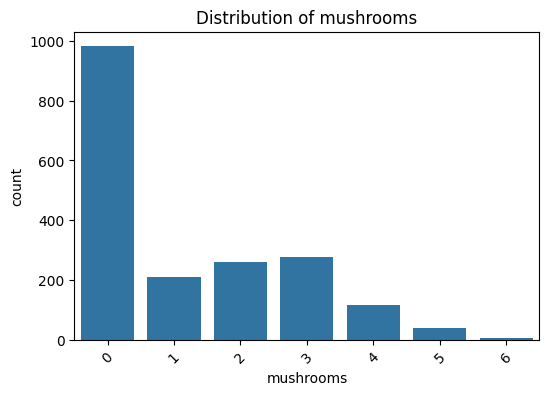

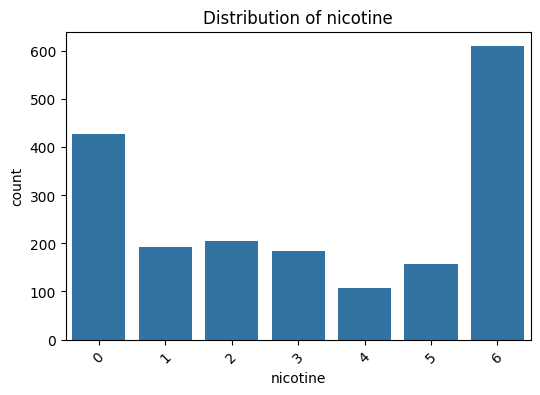

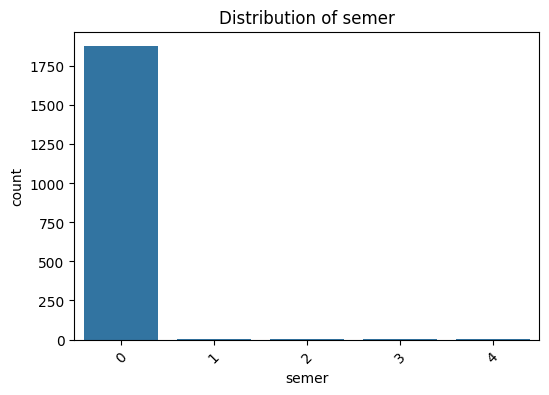

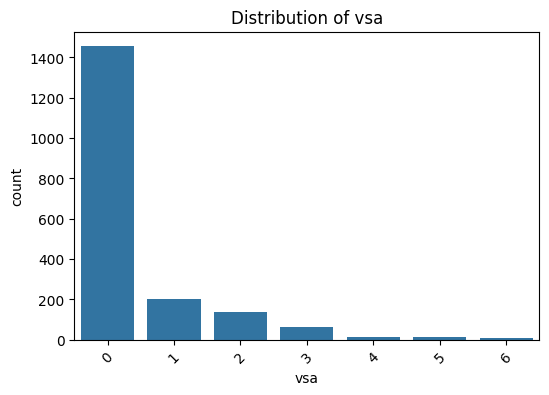

In [6]:
for col in y_decoded.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=y_decoded)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Create y_binary for recent users

In [7]:
# We can see that classes are highly imbalanced for many drugs. Let's convert the problem to binary to slightly reduce this effect

# 2. Convert values to binary
y_binary = y_decoded.applymap(lambda x: 1 if x in [3, 4, 5, 6] else 0)

# View result
y_binary.head(10)

C:\Users\grzes\AppData\Local\Temp\ipykernel_27892\4045898615.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_binary = y_decoded.applymap(lambda x: 1 if x in [3, 4, 5, 6] else 0)


,alcohol,amphet,amyl,benzos,caff,cannabis,choc,coke,crack,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0
2,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
6,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0


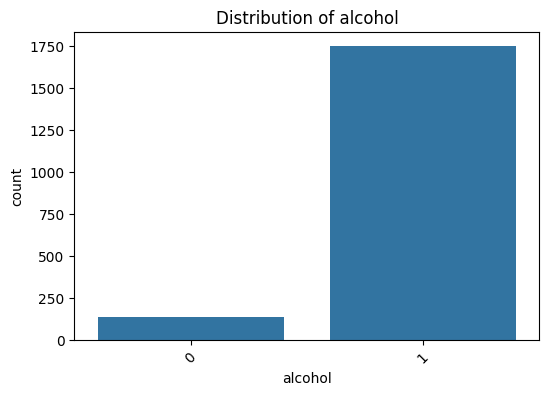

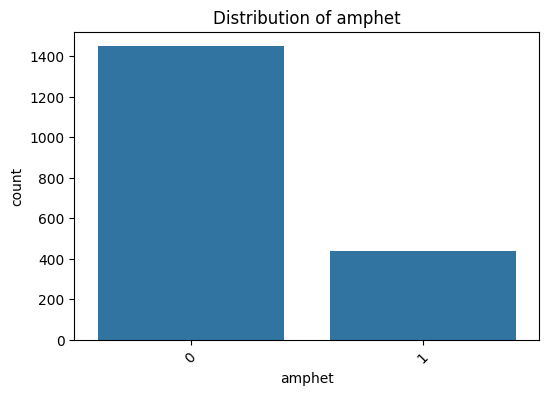

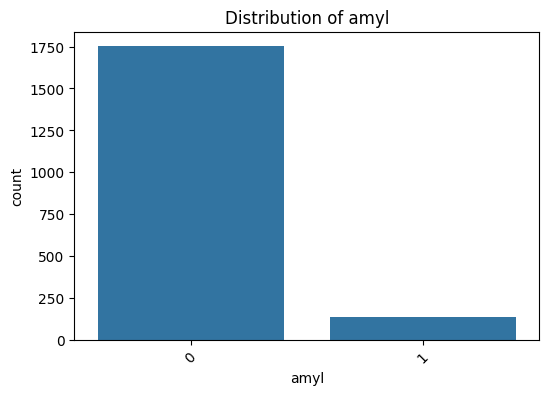

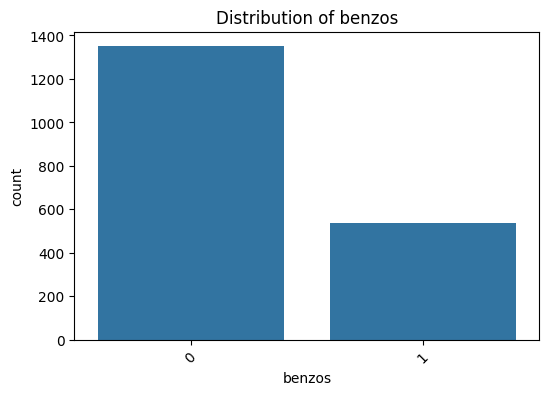

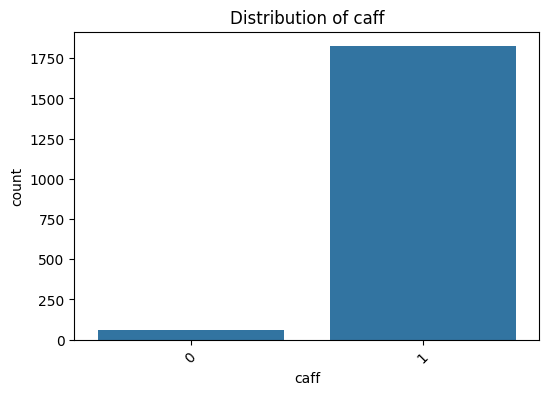

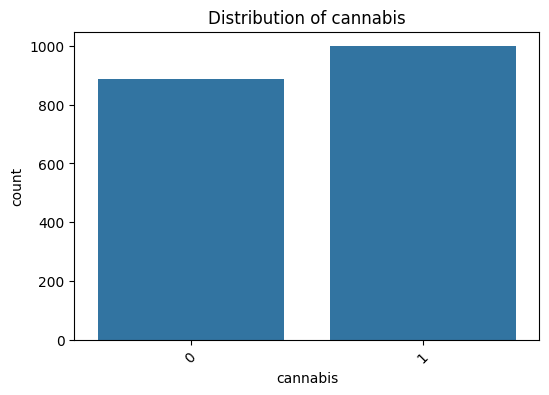

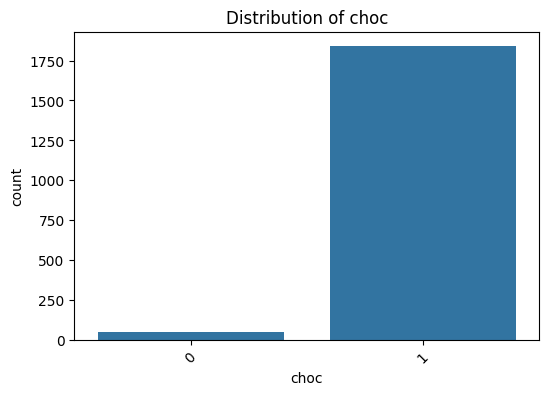

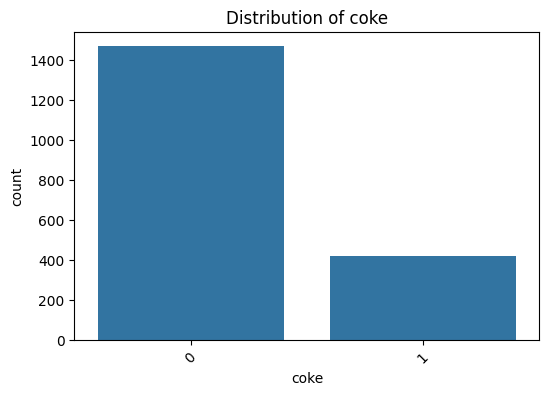

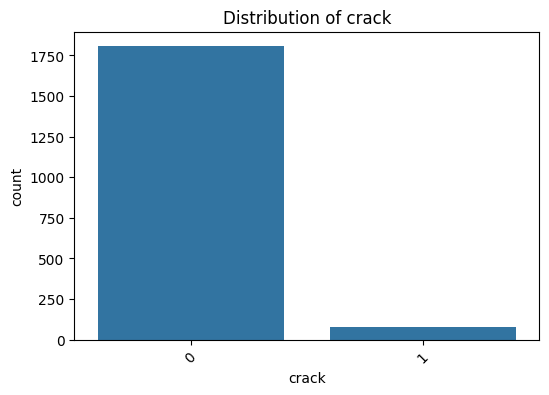

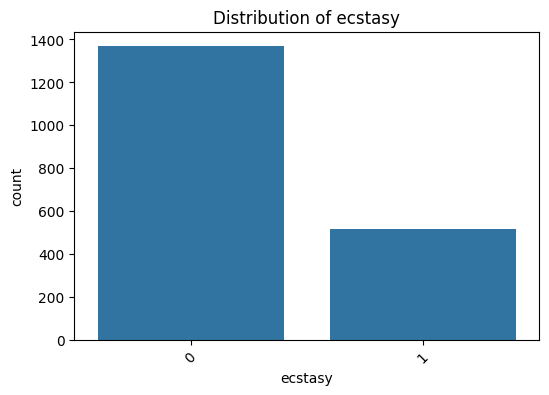

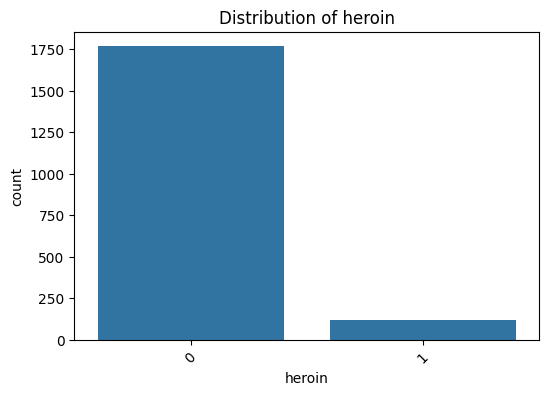

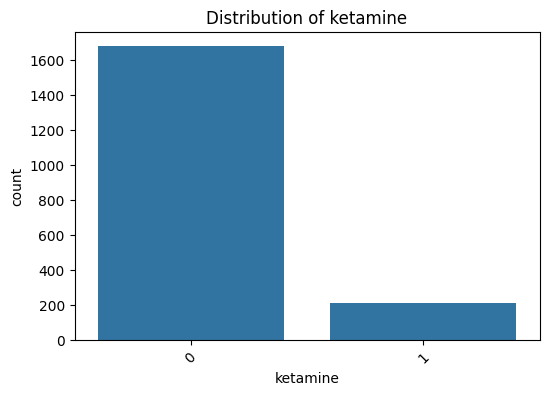

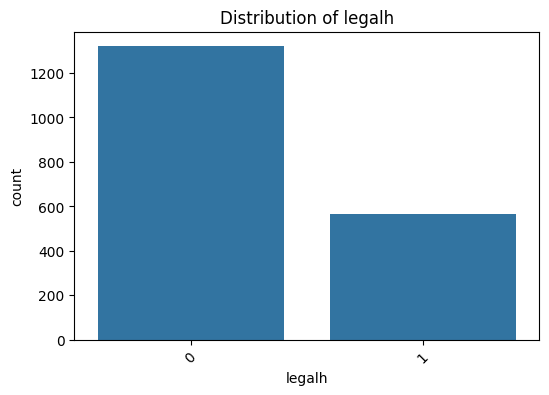

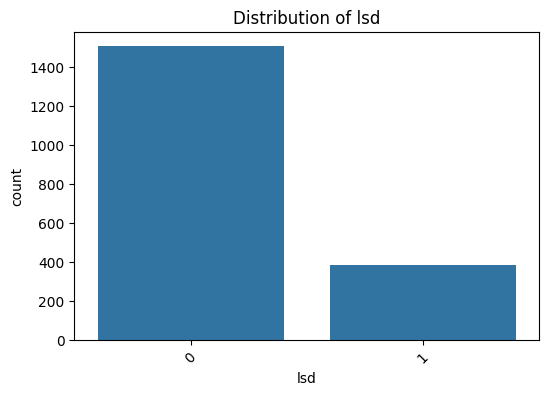

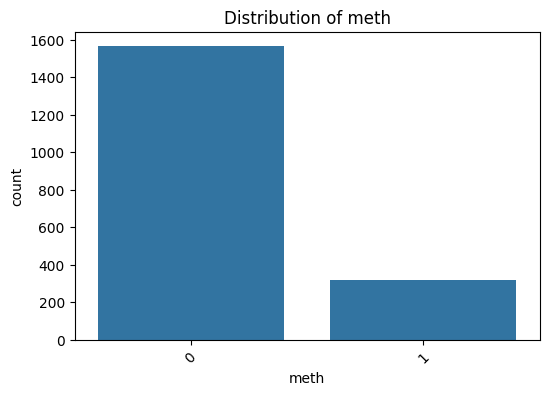

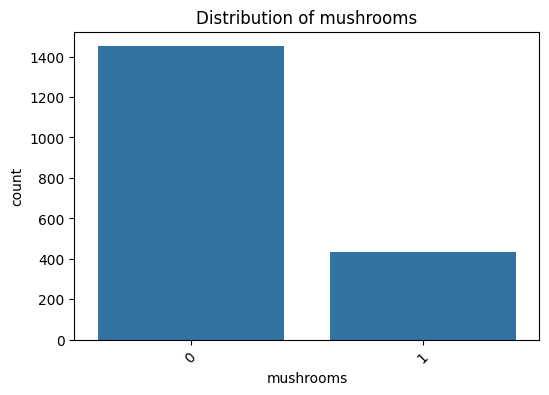

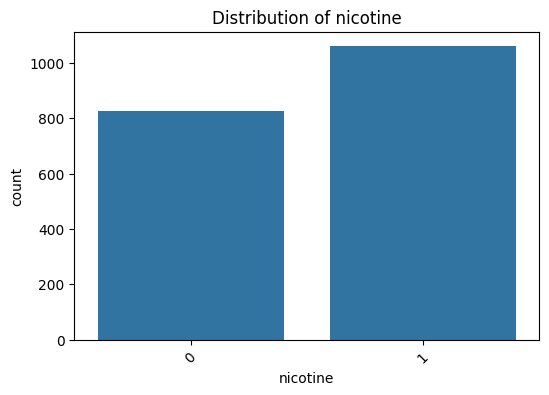

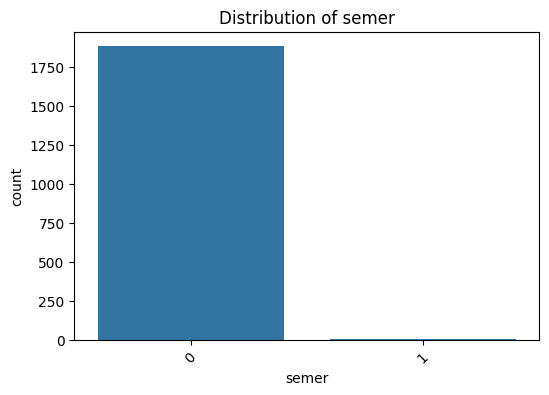

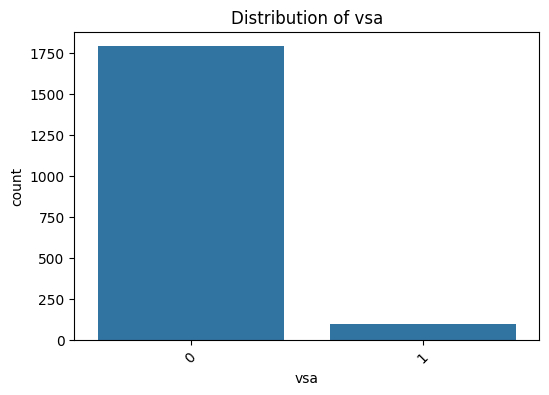

In [8]:
for col in y_binary.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=y_binary)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Drugs correlation matrix

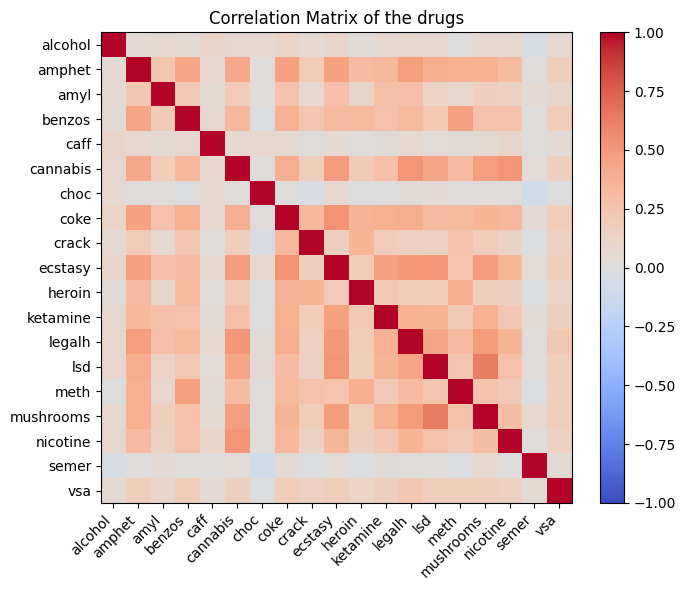

In [12]:
corr = y_binary.corr()

plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# add colorbar
plt.colorbar(im, fraction=0.046, pad=0.04)

# add ticks/labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix of the drugs")
plt.tight_layout()
plt.show()

In [14]:
# It indicates that experience with one drug is associated with expereinace with other drugs
# That's why predicting the usage of certain drugs with other drugs as independent variables would make the job easier for the algorithm

# General drug usage index

In [9]:
# Let's add general_drug_usage index
y_decoded["general_drug_usage"] = y_decoded.sum(axis=1)
df_decoded["general_drug_usage"] = y_decoded["general_drug_usage"]

In [30]:
df_decoded.head()

,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,cscore,...,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa,general_drug_usage
0,35-44,Female,Professional certificate/ diploma,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,2,0,0,22
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,2,0,2,3,0,4,0,0,43
2,35-44,Male,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,1,0,0,0,20
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,2,0,0,0,0,2,0,0,24
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,1,0,0,2,2,0,0,27


# Look at the Xs' classes' dispersion

In [10]:
# List of categorical columns to analyze
cols_to_check = ['age', 'gender', 'education', 'country', 'ethnicity']

print(f"{'VARIABLE':<20} | {'COUNT':<6} | {' % ':<6} | {'MEDIAN USAGE INDEX':<20}")
print("-" * 65)

for col in cols_to_check:
    print(f"\n╔════ {col.upper()} ════╗")
    
    # 1. Calculate Counts and Percentages
    counts = df_decoded[col].value_counts()
    percents = df_decoded[col].value_counts(normalize=True).mul(100).round(2)
    
    # 2. Calculate the Median Usage Index per group
    # We allow observed=False to ensure all categories are shown even if empty
    medians = df_decoded.groupby(col, observed=False)['general_drug_usage'].median()
    
    # 3. Combine into a single view
    summary_table = pd.concat([counts, percents, medians], axis=1, keys=['Count', '%', 'Median Usage'])
    
    # 4. Sort indices for ordinal variables (Age/Education) or by Count for others
    if col in ['age', 'education']:
        summary_table = summary_table.sort_index()
    else:
        summary_table = summary_table.sort_values('Median Usage', ascending=False)
        
    display(summary_table)

VARIABLE             | COUNT  |  %     | MEDIAN USAGE INDEX  
-----------------------------------------------------------------

╔════ AGE ════╗


,Count,%,Median Usage
age,,,
18-24,643,34.11,40.0
25-34,481,25.52,32.0
35-44,356,18.89,26.0
45-54,294,15.60,21.0
55-64,93,4.93,23.0
65+,18,0.95,18.5



╔════ GENDER ════╗


,Count,%,Median Usage
gender,,,
Male,943,50.03,38.0
Female,942,49.97,25.0



╔════ EDUCATION ════╗


,Count,%,Median Usage
education,,,
Doctorate degree,89,4.72,25.0
Left school at 16 years,99,5.25,29.0
Left school at 17 years,30,1.59,40.0
Left school at 18 years,100,5.31,40.0
Left school before 16 years,28,1.49,36.0
Masters degree,283,15.01,23.0
Professional certificate/ diploma,270,14.32,27.0
"Some college or university, no certificate or degree",506,26.84,40.0
University degree,480,25.46,27.0



╔════ COUNTRY ════╗


,Count,%,Median Usage
country,,,
USA,557,29.55,43.0
Republic of Ireland,20,1.06,40.0
Australia,54,2.86,39.0
Other,118,6.26,38.0
New Zealand,5,0.27,36.0
Canada,87,4.62,34.0
UK,1044,55.38,22.5



╔════ ETHNICITY ════╗


,Count,%,Median Usage
ethnicity,,,
Other,63,3.34,42.0
Mixed-White/Asian,20,1.06,42.0
Mixed-Black/Asian,3,0.16,38.0
Mixed-White/Black,20,1.06,33.0
White,1720,91.25,32.0
Asian,26,1.38,17.5
Black,33,1.75,16.0


* Critical Imbalances (Risk of Bias):
    * **Ethnicity:** The dataset is heavily skewed toward **White participants (91.25%)**. Minority groups are severely underrepresented (e.g., Black: 1.75%, Asian: 1.38%), meaning the model will struggle to generalize for non-white populations.
    * **Country:** The data is predominantly **Western/Anglophone**. The **UK (55%)** and **USA (30%)** account for 85% of all records. Countries like New Zealand (0.3%) and Ireland (1%) are statistically negligible.
    * **Age:** There is a significant skew toward youth, with **~60%** of participants under the age of 35.

*  Well-Balanced Features:
    * **Gender:** An almost perfect **50/50 split** between Male and Female. No stratification is needed here.
    * **Education:** Reasonably distributed, with large clusters in "University degree" (25%) and "Some college" (26%), providing a good basis for analyzing education effects.

# General drug usaege index by Xs

<Axes: xlabel='age', ylabel='general_drug_usage'>

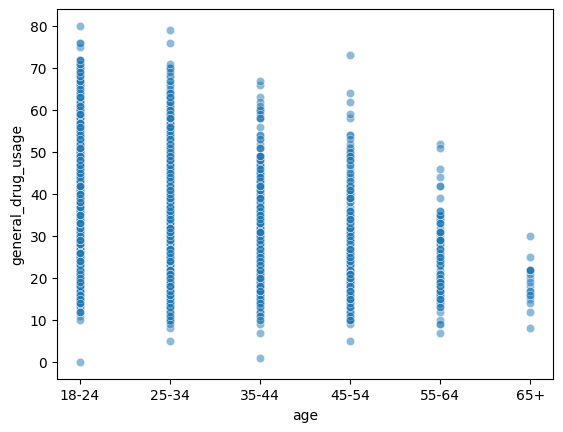

In [20]:
age_order = ["18-24","25-34","35-44","45-54","55-64","65+"]

df_decoded["age"] = pd.Categorical(df_decoded["age"], categories=age_order, ordered=True)

sns.scatterplot(data=df_decoded, x="age", y="general_drug_usage", alpha=0.5)


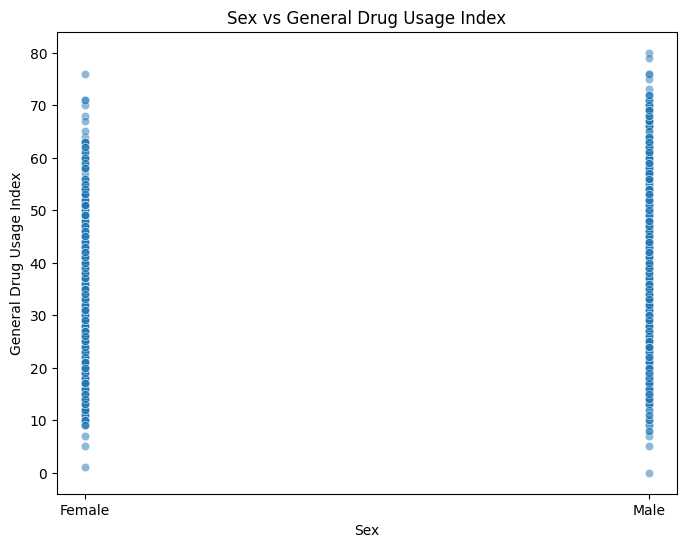

In [21]:
plt.figure(figsize=(8,6))
# Seaborn respects the categorical order automatically
sns.scatterplot(data=df_decoded, x="gender", y="general_drug_usage", alpha=0.5)

plt.xlabel("Sex")
plt.ylabel("General Drug Usage Index")
plt.title("Sex vs General Drug Usage Index")
plt.show()

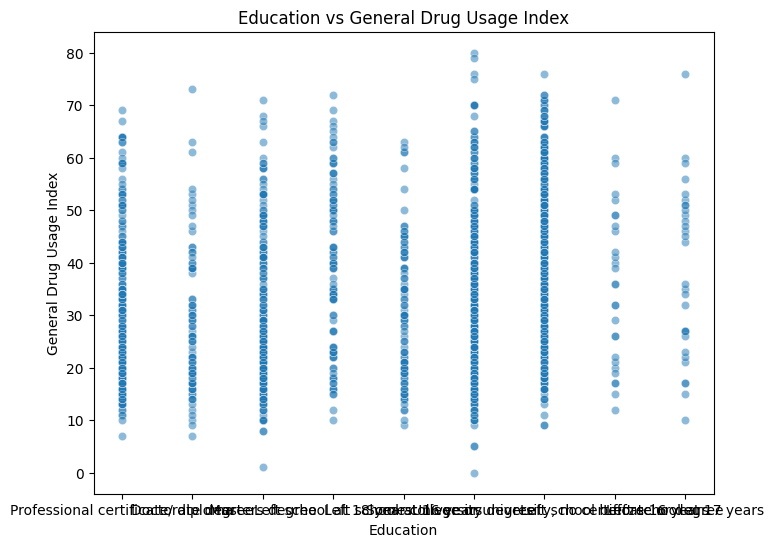

In [22]:
plt.figure(figsize=(8,6))
# Seaborn respects the categorical order automatically
sns.scatterplot(data=df_decoded, x="education", y="general_drug_usage", alpha=0.5)

plt.xlabel("Education")
plt.ylabel("General Drug Usage Index")
plt.title("Education vs General Drug Usage Index")
plt.show()

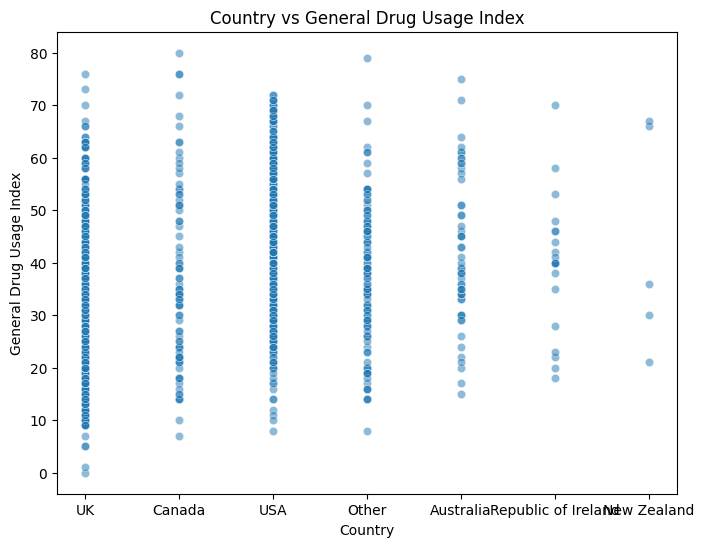

In [23]:
plt.figure(figsize=(8,6))
# Seaborn respects the categorical order automatically
sns.scatterplot(data=df_decoded, x="country", y="general_drug_usage", alpha=0.5)

plt.xlabel("Country")
plt.ylabel("General Drug Usage Index")
plt.title("Country vs General Drug Usage Index")
plt.show()

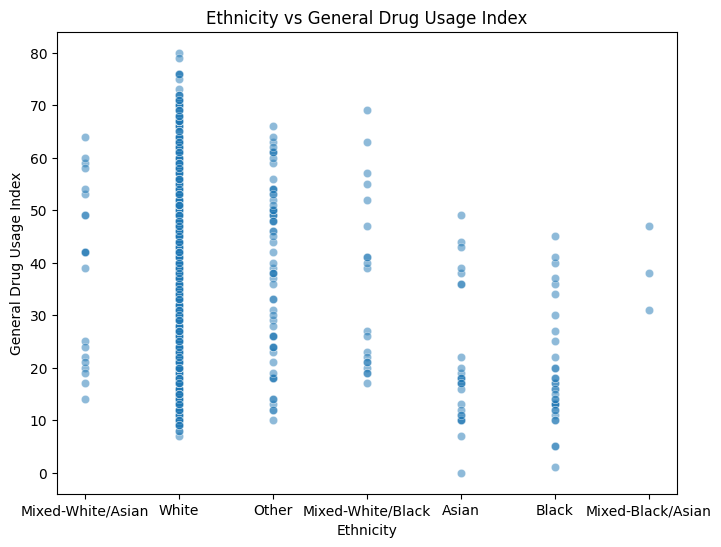

In [24]:
plt.figure(figsize=(8,6))
# Seaborn respects the categorical order automatically
sns.scatterplot(data=df_decoded, x="ethnicity", y="general_drug_usage", alpha=0.5)

plt.xlabel("Ethnicity")
plt.ylabel("General Drug Usage Index")
plt.title("Ethnicity vs General Drug Usage Index")
plt.show()

# What we discovered so far
*Insights derived from the median `general_drug_usage` index across demographic groups and the tables from the overlook of the Xs classes dispesion*

* **The "Young Male" Signal:**
    * **Age Trend:** There is a clear linear decay in drug usage. Usage peaks at **18-24 (Median: 40.0)** and drops steadily every decade, reaching its lowest at **65+ (Median: 18.5)**.
    * **Gender Gap:** Males show a significantly higher median usage index (**38.0**) compared to Females (**25.0**).

* **The "Country Paradox":**
    * Despite the **UK** contributing the most data (55%), its median drug usage is relatively low (**22.5**).
    * The **USA** (30% of data) has nearly **double** the median usage (**43.0**).

* **Education's "Bell Curve":**
    * Usage does not strictly decrease with education. The highest consumption is found in the **middle tiers** (Left school at 18 / Some college: Median **40.0**).
    * Highly educated participants (Masters/Doctorate) share low usage rates (**~23-25**) similar to the lowest education tiers.

* **Ethnicity Signals (Use with Caution):**
    * **Mixed/Other** groups show high usage medians (**~42.0**), but sample sizes are tiny (<20), posing an overfitting risk.
    * **Black** and **Asian** groups display the lowest median usage (**16.0** and **17.5**), distinct from the White baseline (**32.0**).

# Personality scores vs general drug consumption

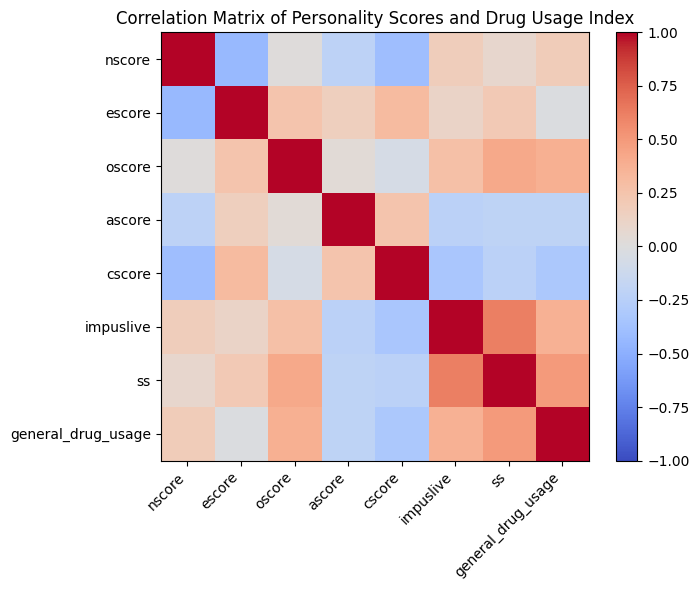

In [26]:
# features of interest + target
scores = ['nscore','escore','oscore','ascore','cscore','impuslive','ss' ,'general_drug_usage']

# compute correlation matrix
corr = df_decoded[scores].corr()

# plot correlation matrix as heatmap
plt.figure(figsize=(8,6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# add colorbar
plt.colorbar(im, fraction=0.046, pad=0.04)

# add ticks/labels
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Correlation Matrix of Personality Scores and Drug Usage Index")
plt.tight_layout()
plt.show()


In [27]:
# As far as the general willigness to take drugs is concerned, it is correlated with impulsivness, Openness to experience and Neuroticism


# Save the data

In [29]:
y_binary.to_csv('Data/y_binary.csv', index=False)   # new file

y_decoded.to_csv('Data/y_decoded.csv', index=False)  # OVERWRITE - I added general_drug_usage index
df_decoded.to_csv('Data/df_decoded.csv', index=False)  # OVERWRITE - I added general_drug_usage index